# Übung 1 Einlesen und Anzeigen der Datensätze

**German Traffic Sign Detection Benchmark**

Detallierte Beschreibung des Datensatzes siehe unter folgendem [Link](http://benchmark.ini.rub.de/?section=gtsdb&subsection=news)

## Imports

In [1]:
# Die folgenden Anweisungen müssen nur ein mal ausgeführt werden
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
import os
import csv
import wget
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [3]:
# Testfunktion für ipywidgets: 
# Es soll ein Slider angezeigt werden. Der Wertebereich des Sliders
# soll zwischen -10(min) und 30(max) liegen. 
# Entsprechend der Sliderposition soll ein Ergebniswert angezeigt werden.
def f(x):
    return 3 * x
interact(f, x= 10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

## Verwendete  Module / Funktionen

Mache dich mit der Funktionsweise foldender Module / Funktionen vertraut.
Sie können zur Lösung der Aufgaben eingesetzt werden.
- os.path
- os.listdir
- [csv.reader](https://docs.python.org/3/library/csv.html)
- string.split
- np.unique
- list.append
- plt.imread
- plt.imshow
- plt.show
- dict
- zip
- dict(zip())
- sorted
- cv2.rectangle
- cv2.putText
- dict.keys
- dict.values
- enumerate
- range
- interact

## Aufgabe 1 – Einlesen der "Ground Truth"-Textdatei

### Aufgabe 1.a
Lade den Datensatz herunter und entpacke ihn.
Unter folgendem [Link](https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/published-archive.html) kannst du die Kurzbeschreibung des Datensatzes einsehen.

In [4]:
# Es wird ein Weilchen dauern die Daten herunterzuladen (1,54GB)
# Nach dem erfolgreichen Herunterladen kann dieser Block auskommentiert werden
# url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
# wget.download(url)
# 德国交通标志的训练集

In [6]:
# Definiere den Pfad zum heruntergeladenen Datenordner
path_to_data = "../dataset/FullIJCNN2013"
# Prüfe, ob der Pfad existiert / korrekt eingegeben wurde
assert os.path.exists(path_to_data) , "Der angegebene Pfad existriert nicht." #assert语句，如果条件为假，打印警告

In [7]:
# Um hartcodierte Namen in den Funktionen zu vermeiden, definiere an dieser Stelle
# alle Variablen, die als Eingabeparameter der Funktionen verwendet werden
# list = []
# with open("../dataset/FullIJCNN2013/gt.txt") as txt_file:
#     gt_txt = csv.reader(txt_file, delimiter = ";")
#     for row in gt_txt:
#         print(row)


# hard code： 硬编码，指本来可以用变量结果用常量搞得参数不好修改
# 因为现在操作系统并不允许普通程序直接操作硬盘，所以文件就是请求操作系统打开一个文件对象，然后，通过操作系统提供的接口从这个文件对象中读取数据。
# open()就是以读文件的模式打开文件对象，然后再用csv.reader()来读写

In [3]:
def list_not_annotated_images(path_to_data_folder, gt_txt_file):
    """
        Liest Verkehrszeichendaten des German Traffic Sign Detection Benchmarks
        Argumente: Pfad zum heruntergeladenen Datenordner, gt.txt-Datei
        Rückgabe:(return)  Liste mit den Namen der Bilder, die nicht annotiert wurden,
                   Anzahl nicht annotierter Bilder
    """
    ###   TO DO   ###
    # Definiere den Pfad zur gt.txt
    txt_filepath = os.path.join(path_to_data_folder,gt_txt_file)
    assert os.path.exists(txt_filepath), "Der angegebene Pfad existriert nicht."
    
    # Definiere eine leere Liste für Bildnamen
    list_img_names = []
    
    # Öffne die gt.txt-Datei
    with open(txt_filepath, newline='') as csvfile:
        gt_reader = csv.reader(csvfile)
        
        # Bau eine Schleife, um die Daten Zeile für Zeile einzulesen und list_img_names zu füllen
        for row in gt_reader:
            list_img_names.append(row[0].split(sep = ';')[0])

            
    # Entferne doppelte Einträge aus der Liste
    list_img_names = np.unique(list_img_names)
    
    # Ermittle, welche Bildnamen fehlen und mache daraus eine Liste
    list_all_file_names = os.listdir(path_to_data_folder)
    list_all_img_names = []

    for file in list_all_file_names:
        if os.path.splitext(file)[1] == ".ppm":
            list_all_img_names.append(file)

    list_missing_names = list(set(list_all_img_names).difference(set(list_img_names)))

    
    # Ermittle die Anzahl der fehlenden Bildnamen
    number_missing_img = len(list_all_img_names) - len(list_img_names)
    
    # Gebe folgendes aus: "In total XYZ images in the data folder are not annotated."
    # Anstelle von XYZ soll die Anzahl der nicht annotierten Bilder ausgegeben werden
    print(f"In total {number_missing_img} images in the data folder are not annotated.")
    
    return list_missing_names, number_missing_img

### Aufgabe 1.c
Ermittle die Namen und die Anzahl der Bilder, die in der "Ground Truth"-Textdatei gt.txt nicht annotiert wurden.

Nützliche Funktionen:
- os.path
- [csv.reader](https://docs.python.org/3/library/csv.html)
- string.split
- len
- np.unique
- list.append
- range

In [4]:
# Rufe die Funktion aus und prüfe, ob alles wie erwartet funktioniert
missing_img_list, missing_img_number = list_not_annotated_images("../dataset/FullIJCNN2013/", "gt.txt")

print(missing_img_list,"\n",missing_img_number)


In total 159 images in the data folder are not annotated.
['00724.ppm', '00555.ppm', '00332.ppm', '00540.ppm', '00326.ppm', '00826.ppm', '00462.ppm', '00727.ppm', '00572.ppm', '00541.ppm', '00581.ppm', '00713.ppm', '00590.ppm', '00573.ppm', '00617.ppm', '00394.ppm', '00354.ppm', '00843.ppm', '00819.ppm', '00574.ppm', '00139.ppm', '00577.ppm', '00510.ppm', '00562.ppm', '00781.ppm', '00389.ppm', '00550.ppm', '00442.ppm', '00399.ppm', '00890.ppm', '00767.ppm', '00331.ppm', '00335.ppm', '00765.ppm', '00543.ppm', '00800.ppm', '00726.ppm', '00429.ppm', '00614.ppm', '00539.ppm', '00687.ppm', '00235.ppm', '00677.ppm', '00799.ppm', '00345.ppm', '00786.ppm', '00636.ppm', '00790.ppm', '00546.ppm', '00506.ppm', '00145.ppm', '00563.ppm', '00437.ppm', '00591.ppm', '00629.ppm', '00336.ppm', '00568.ppm', '00875.ppm', '00595.ppm', '00708.ppm', '00753.ppm', '00578.ppm', '00576.ppm', '00407.ppm', '00589.ppm', '00584.ppm', '00597.ppm', '00718.ppm', '00709.ppm', '00757.ppm', '00666.ppm', '00585.ppm', '0052

### Aufgabe 1.d
Schreibe eine Funktion, die die gt.txt-Datei einliest und drei Listen zurückgibt:
- die Liste mit relativen Bildpfaden (strings),
- die Liste mit ClassIDs (integers)
- die Liste mit ROI-Koordinaten (integers)

Einzelne Schritte kannst du aus list_not_annotated_images-Funktion übernehmen.

In [3]:
def read_txt(path_to_data_folder, gt_txt_file):
    """
        Liest Verkehrszeichendaten des German Traffic Sign Detection Benchmarks
        Argumente: Pfad zum heruntergeladenen Datenordner
        Rückgabe:  Liste mit relativen Bildpfaden, Liste mit ClassIDs, Liste mit ROI-Koordinaten
    """
    ###   TO DO   ###
    # Definiere den Pfad zur gt.txt
    # dir_path = "../dataset/FullIJCNN2013/"
    # txt_filepath = "../dataset/FullIJCNN2013/gt.txt"

    txt_filepath = os.path.join(path_to_data_folder,gt_txt_file)
    
    # Prüfe, ob der Pfad existiert / korrekt eingegeben wurde
    assert os.path.exists(txt_filepath), "Der angegebene Pfad existriert nicht."
    
    # Definiere leere Listen
    # Liste für Bildpfade
    img_paths_list = []
    
    # Liste für Class_IDs
    class_ids_list =[]
    
    # Liste für ROIs
    rois_list = []
    
    # Öffne die gt.txt-Datei und ergänze den Code, um die entsprechenden Listen zu füllen
    with open(txt_filepath, newline='') as csvfile:
        gt_reader = csv.reader(csvfile, delimiter = ';')

        for row in gt_reader:
            img_paths_list.append(path_to_data_folder + row[0])
            class_ids_list.append(int(row[5]))
            rois_list.append([int(row[1]), int(row[2]), int(row[3]), int(row[4])])
    return img_paths_list, class_ids_list, rois_list

In [6]:
dir_path = "../dataset/FullIJCNN2013/"
gt_txt_file = "gt.txt"
ppm_file_paths, class_ids, rois = read_txt(dir_path, gt_txt_file)
print(ppm_file_paths,class_ids,rois)

['../dataset/FullIJCNN2013/00000.ppm', '../dataset/FullIJCNN2013/00001.ppm', '../dataset/FullIJCNN2013/00001.ppm', '../dataset/FullIJCNN2013/00001.ppm', '../dataset/FullIJCNN2013/00002.ppm', '../dataset/FullIJCNN2013/00003.ppm', '../dataset/FullIJCNN2013/00003.ppm', '../dataset/FullIJCNN2013/00003.ppm', '../dataset/FullIJCNN2013/00004.ppm', '../dataset/FullIJCNN2013/00004.ppm', '../dataset/FullIJCNN2013/00005.ppm', '../dataset/FullIJCNN2013/00006.ppm', '../dataset/FullIJCNN2013/00007.ppm', '../dataset/FullIJCNN2013/00008.ppm', '../dataset/FullIJCNN2013/00008.ppm', '../dataset/FullIJCNN2013/00009.ppm', '../dataset/FullIJCNN2013/00010.ppm', '../dataset/FullIJCNN2013/00011.ppm', '../dataset/FullIJCNN2013/00011.ppm', '../dataset/FullIJCNN2013/00012.ppm', '../dataset/FullIJCNN2013/00013.ppm', '../dataset/FullIJCNN2013/00014.ppm', '../dataset/FullIJCNN2013/00015.ppm', '../dataset/FullIJCNN2013/00016.ppm', '../dataset/FullIJCNN2013/00017.ppm', '../dataset/FullIJCNN2013/00017.ppm', '../dataset

Bildgröße (800, 1360, 3)
Class ID:  13


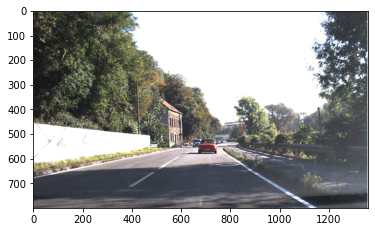

In [46]:
# Teste, ob die Bilder sich anzeigen lassen
# Nutze hier die Listen ppm_filenames, class_ids, die du mit read_txt berechnet hast
img = plt.imread(ppm_file_paths[100])
print("Bildgröße", img.shape)
print("Class ID: ", class_ids[100])
plt.imshow(img)
plt.show()

## Aufgabe 2 – Mapping ClassID – Bezeichnung der Verkehrsschilder
Generiere eine csv-Mapping-Datei aus ReadMe.txt. Nutze dafür alle dir zur Verfügung stehenden Mittel. Python Code ist für diese Aufgabe kein Muss. Die Datei soll das Mapping von Zahl zur Verkehrszeichenbezeichnung enthalten.
Schreibe eine Funktion, die zwei Rückgabewerte zurückgibt:
- pandas-DataFrame aus der generierten csv-Datei und
- eine Dictionary (dict) mit ClassIDs als *keys* und Verkehrsschilderbezeichnungen als *values*.

Nützliche Module / Funktionen:
- pd.read_csv
- os.path
- dict(zip())

In [4]:
###   TO DO   ###
# Generiere eine csv-Mapping-Datei und lege sie in den Datenordner ab
# Definiere die Variable csv_mapping, z.B.: 'tf_signs_mapping.csv' (entspricht dem Namen der generierten Datei)

dir_path = "../dataset/FullIJCNN2013/"
readme_txt = "ReadMe.txt"
readme_txt_path = os.path.join(dir_path, readme_txt)
csv_mapping = "tf_signs_mapping.csv"
csv_mapping_path = os.path.join(dir_path, csv_mapping)
csv_list = []

assert os.path.exists(readme_txt_path), "Der angegebene Pfad existriert nicht."
with open(readme_txt_path,'r') as f:
    data = f.read().splitlines()[39:82]
    for i in range(len(data)):
        csv_list.append(data[i].split(" = "))

assert os.path.exists(csv_mapping_path), "Der angegebene Pfad existriert nicht."
with open(csv_mapping_path,'w') as f:
     write = csv.writer(f)
     write.writerows(csv_list)

In [4]:
def map_int_to_sign_name(path_to_data_folder, csv_mapping_file):
    """
    Ordnet int-Zahl dem Schildnamen zu
    Argumente: Pfad zum Datenordner, Name der csv-Datei
    Rückgabe:  pandas-DataFrame aus der generierten csv-Datei und 
              eine Dictionary (dict) mit ClassIDs als keys und Traffic Sign Names als values
    """
    
    ###   TO DO   ###
    csv_path = os.path.join(path_to_data_folder, csv_mapping_file)
    
    assert os.path.exists(csv_path), "Der angegebene Pfad existriert nicht."
    # Lese die csv-Datei als DataFrame ein
    df = pd.read_csv(csv_path, header=None)
    df.columns = ['ClassID','Traffic_Sign_Name']

    # dict_mapping-Variable soll eine Dictionary (dict) sein, mit ClassIDs als keys und Traffic Sign Names als values

    # dict_mapping = df.set_index('ClassID')['Traffic_Sign_Name'].to_dict()
    dict_mapping = dict(zip(df['ClassID'],df['Traffic_Sign_Name']))

    return dict_mapping, df

In [67]:
dict_mapping, df_map = map_int_to_sign_name(dir_path, csv_mapping)

In [68]:
# Übersicht der Klassen
df_map.style.hide_index()

ClassID,Traffic_Sign_Name
0,speed limit 20 (prohibitory)
1,speed limit 30 (prohibitory)
2,speed limit 50 (prohibitory)
3,speed limit 60 (prohibitory)
4,speed limit 70 (prohibitory)
5,speed limit 80 (prohibitory)
6,restriction ends 80 (other)
7,speed limit 100 (prohibitory)
8,speed limit 120 (prohibitory)
9,no overtaking (prohibitory)


## Aufgabe 3 – Visualisierung der Verkehrszeichen
Schreibe eine Funktion, die ein Bild pro Klasse ausgibt. Verwende dafür die Bilder in den Unterordnern, die 
bereits nach **ClassID** genannt sind, um die Klassenzuordnung herzustellen. Für das Mapping verwende Variable **dict_mapping**, die in Aufgabe 2 berechnet wurde.

Nützliche Module / Funktionen:
- interact
- os.path
- list.append

In [6]:
def one_image_per_class(path_to_data_folder):
    """
    Gibt eine Liste mit je einem Bildpfad pro Klasse zurück
    Argumente: Pfad zum Datenordner
    Rückgabe: Liste mit Bildpfaden
    """

    ###   TO DO   ###
    # Definiere eine leere Liste für Bildpfade
    img_paths = []
    
    # Generiere eine Liste mit den Namen der Unterordner. Python os-Modul kann hier nützlich sein
    dir_list_all_files = os.listdir(path_to_data_folder)
    subfolders_paths = []

    for file in dir_list_all_files:
        if os.path.isdir(os.path.join(path_to_data_folder, file)):
            subfolders_paths.append(os.path.join(path_to_data_folder, file))
    subfolders_paths.sort()


    # Iteriere über die Unterordner-Pfade und speichere je ein Bildpfad aus den Unterordnern 
    for path in subfolders_paths:
        assert os.path.exists(path), "Der angegebene Pfad existriert nicht."
        # Generiere einen gültigen Bildpfad
        paths_in_folder = os.listdir(path)
        img_path = os.path.join(path, paths_in_folder[np.random.randint(0,len(paths_in_folder),dtype=int)]) # print an image in the folder randomly
        assert os.path.exists(img_path), "Der angegebene Pfad existriert nicht."
        
        # Füge jeden Bildpfad der Liste img_paths hinzu
        img_paths.append(img_path)
        
    return img_paths

In [7]:
dir_path = "../dataset/FullIJCNN2013/"
img_paths_43_classes = one_image_per_class(dir_path)
print(img_paths_43_classes)

['../dataset/FullIJCNN2013/00/00003.ppm', '../dataset/FullIJCNN2013/01/00075.ppm', '../dataset/FullIJCNN2013/02/00071.ppm', '../dataset/FullIJCNN2013/03/00010.ppm', '../dataset/FullIJCNN2013/04/00004.ppm', '../dataset/FullIJCNN2013/05/00026.ppm', '../dataset/FullIJCNN2013/06/00005.ppm', '../dataset/FullIJCNN2013/07/00017.ppm', '../dataset/FullIJCNN2013/08/00047.ppm', '../dataset/FullIJCNN2013/09/00029.ppm', '../dataset/FullIJCNN2013/10/00071.ppm', '../dataset/FullIJCNN2013/11/00003.ppm', '../dataset/FullIJCNN2013/12/00084.ppm', '../dataset/FullIJCNN2013/13/00075.ppm', '../dataset/FullIJCNN2013/14/00019.ppm', '../dataset/FullIJCNN2013/15/00012.ppm', '../dataset/FullIJCNN2013/16/00002.ppm', '../dataset/FullIJCNN2013/17/00015.ppm', '../dataset/FullIJCNN2013/18/00003.ppm', '../dataset/FullIJCNN2013/19/00001.ppm', '../dataset/FullIJCNN2013/20/00003.ppm', '../dataset/FullIJCNN2013/21/00001.ppm', '../dataset/FullIJCNN2013/22/00003.ppm', '../dataset/FullIJCNN2013/23/00006.ppm', '../dataset/Ful

In [53]:
def show_img_tr_sign(idx):
    ###   TO DO   ###
    # Definiere eine print()- Funktion deren Ausgabe folgende Form hat:
    # ClassID XY: dazu passende Bezeichnung
    # z.B.: ClassID 25:  construction (danger)
    print("ClassID {} : {}".format(idx, dict_mapping[idx]))
    
    plt.figure(figsize=(6,6))
    img = plt.imread(img_paths_43_classes[idx])
    plt.imshow(img)
    plt.show()

ClassID 0 : speed limit 20 (prohibitory)


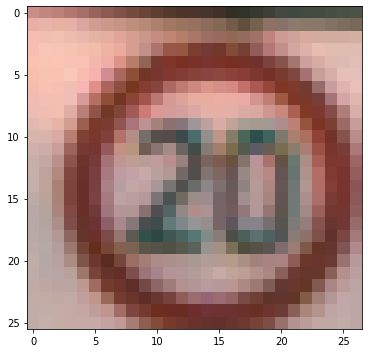

In [79]:
dir_path = "../dataset/FullIJCNN2013/"
img_paths_43_classes = one_image_per_class(dir_path)

show_img_tr_sign(0)

In [55]:
# Nutze interaktive Anzeige, um die Bilder anzusehen
interact(show_img_tr_sign, idx=widgets.IntSlider(min=0,max=len(img_paths_43_classes)-1,step=1, value=0))

interactive(children=(IntSlider(value=0, description='idx', max=42), Output()), _dom_classes=('widget-interact…

<function __main__.show_img_tr_sign(idx)>

## Aufgabe 4 – Anzeige der ROIs (Regions of Interest)
Schreibe eine Funktion, um innerhalb der angezeigten Bilder die Verkehrsschilder zu markieren. Verwende dafür die Bilder im Hauptordner und die dazugehörige gt.txt. Bedenke, dass jedes Bild nur einmal angezeigt werden soll. 

Nützliche Module / Funktionen:
- dict(zip())
- cv2.rectangle
- cv2.putText

In [ ]:
def calc_rois(path_to_data_folder, csv_mapping_file, gt_txt_file):
    """
    Zeichnet ROIs und deren Bezeichnungen in die Bilder ein
    Argumente: Pfad zum heruntergeladenen Datenordner, Dateinamen
    Rückgabe:  Liste mit Bildern 
    """
    # Die Funktionen map_int_to_sign_name und read_txt sollten bereits implementiert sein  
    map_tr_sing_int, df_map = map_int_to_sign_name(path_to_data_folder, csv_mapping_file) # map_tr_sing_int is dict,    df_map is dataframe
    ppm_filenames, class_ids, rois = read_txt(path_to_data_folder, gt_txt_file)

    ###   TO DO   ###
    # Definiere eine leere Liste für die Speicherung von Bildern
    data = []
    # Definiere ein leeres Dictionary
    data_dict = []
    
    curr_path = ""
    img = None
    counter_identical_path = 0
    # Bevor du weitermachst, versuche zu verstehen, was in if- und else-Blöcken der Schleife passiert
    for idx, file_path in enumerate(ppm_filenames):
        if curr_path != file_path: 
            curr_path = file_path
            # Lese ein Bild ein
            img = plt.imread(file_path)
            counter_identical_path = 1
            # Definiere Koordinaten für die Positionierung des Textfeldes mit Beschreibung des Verkehrszeichens
            initial_x_coordinate = 400
            initial_y_coordinate = int(len(img) - 20)
            # Bei dieser Variable handelt es sich um org-Parameter der cv2.putText
            org_id_meaning = (initial_x_coordinate, initial_y_coordinate)
        else: # 一个图片里有可能有两个以上的texts，所以 curr_path 有可能等于 file_path
            counter_identical_path += 1
            # Passe die x-Koordinate für jedes weitere Verkehrszeichen an
            # Folgende Zeilen sind eventuell optional 
            # Es hängt davon ab, wo du die Bezeichnung positionierst
            initial_y_coordinate -= 30
            org_id_meaning = (initial_x_coordinate, initial_y_coordinate)

        # Berechne Koordinaten des Rechtecks, benutze dafür die Variable rois
        point1 = (rois[idx][0], rois[idx][1])
        point2 = (rois[idx][2], rois[idx][3])
        
        # Zeichne das Rechteck mit Hilfe der berechneten Koordinaten in das Bild (cv2.rectangle) ein
        img = cv2.rectangle(img, point1, point2, color= (0, 0, 255) ,thickness = 2)
        
        # Ermittle Koordinaten für das Textfeld
        org = (rois[idx][2] + 10, rois[idx][1] + 20)

        # Speichere Verkehrszeichen-ID als string
        text = "ID: " + str(class_ids[idx])

        # Nutze cv2.putText um die Verkehrszeichen-ID neben dem entsprechenden Verkehrszeichen zu positionieren
        img = cv2.putText(img, text = text, org = org, fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale= 0.7, color = (255, 0, 0), thickness = 2)

        # Speichere Verkehrszeichen-ID mit der dazugehörigen Bezeichnung als string
        text_id_meaning = "Class ID: " + str(class_ids[idx]) + "  " + map_tr_sing_int[class_ids[idx]]

        # Nutze cv2.putText um text_id_meaning im Bild zu positionieren
        img = cv2.putText(img, text = text_id_meaning, org = org_id_meaning, fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale= 0.7, color = (255, 0, 0), thickness = 2)

        # Füge jedes Bild der data-Liste hinzu
        data.append(img)

    
    # Benutze die Verkettung dict(zip()). Die Dictionary soll Pfadnamen als keys und Bilder als Dictionaries enthalten 
    data_dict = dict(zip(ppm_filenames,data))

    # Schpeichere die Bilder aus data_dict in die Liste
    data_list = []
    for keys in data_dict:
        data_list.append(data_dict[keys])
  
    return data_list

In [ ]:
dir_path = "../dataset/FullIJCNN2013/"
csv_file = "tf_signs_mapping.csv"
gt_txt_file = "gt.txt"

data = calc_rois(dir_path, csv_file, gt_txt_file)

In [ ]:
def show_img(idx):
    '''
    Helper-Funktion, die als erstes Parameter bei interact eingesetzt wird
    '''
    plt.figure(figsize=(16,8))
    plt.imshow(data[idx])
    plt.show()

In [ ]:
# show_img()

In [ ]:
interact(show_img, idx=widgets.IntSlider(min=0,max=len(data),step=1, value=0));

## GESCHAFFT !!!

## Questions:

is the function of dict to Rmove duplicated images?

```
# Schpeichere die Bilder aus data_dict in die Liste
data_list = []
for keys in data_dict:
    data_list.append(data_dict[keys])
```
